## Trenowanie pierwszego drzewa dla problemu regresji

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.tree import (
    DecisionTreeRegressor,
    plot_tree
)
from sklearn.linear_model import LinearRegression

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv'
advertising = pd.read_csv(url, index_col=0)

In [3]:
advertising.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


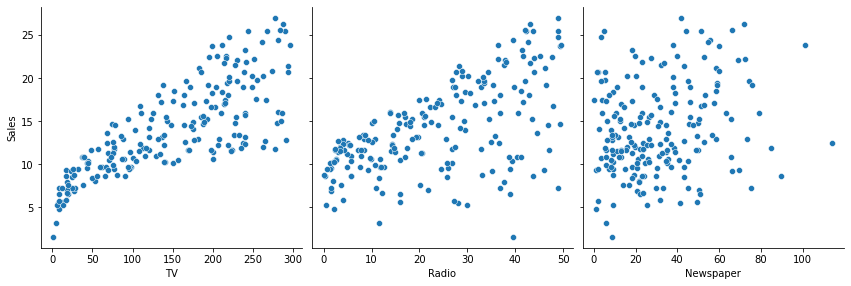

In [5]:
import seaborn as sns


#Pairplot
sns.pairplot(advertising, x_vars = ['TV', 'Radio', 'Newspaper'],
            y_vars = 'Sales', height = 4, kind='scatter')
plt.show()

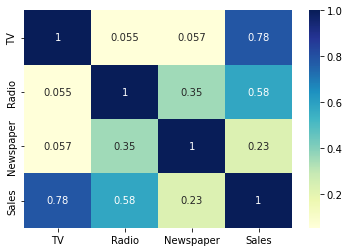

In [6]:
#heatmapa
sns.heatmap(advertising.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [17]:
## model drzewa decyzyjnego ale w przypadku problemu regresji:

feature_names = ['TV','Radio','Newspaper']
model_reg= DecisionTreeRegressor(max_depth=10).fit(advertising[feature_names], advertising['Sales'])

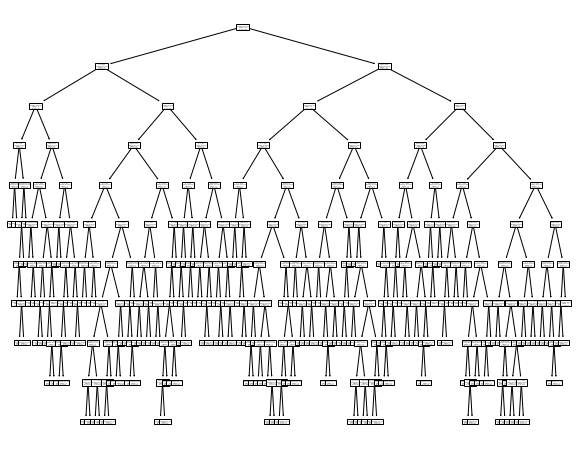

In [18]:
plt.figure(figsize = (10, 8))
plot_tree(model_reg, feature_names = feature_names)
plt.show();

In [19]:
from sklearn import tree
text_representation = tree.export_text(model_reg)
print(text_representation)

|--- feature_0 <= 122.05
|   |--- feature_0 <= 30.05
|   |   |--- feature_0 <= 8.65
|   |   |   |--- feature_0 <= 4.75
|   |   |   |   |--- feature_1 <= 25.60
|   |   |   |   |   |--- value: [3.20]
|   |   |   |   |--- feature_1 >  25.60
|   |   |   |   |   |--- value: [1.60]
|   |   |   |--- feature_0 >  4.75
|   |   |   |   |--- feature_2 <= 46.00
|   |   |   |   |   |--- feature_0 <= 8.50
|   |   |   |   |   |   |--- feature_1 <= 27.65
|   |   |   |   |   |   |   |--- value: [5.70]
|   |   |   |   |   |   |--- feature_1 >  27.65
|   |   |   |   |   |   |   |--- feature_2 <= 25.40
|   |   |   |   |   |   |   |   |--- value: [5.30]
|   |   |   |   |   |   |   |--- feature_2 >  25.40
|   |   |   |   |   |   |   |   |--- value: [5.50]
|   |   |   |   |   |--- feature_0 >  8.50
|   |   |   |   |   |   |--- value: [4.80]
|   |   |   |   |--- feature_2 >  46.00
|   |   |   |   |   |--- value: [6.60]
|   |   |--- feature_0 >  8.65
|   |   |   |--- feature_1 <= 23.70
|   |   |   |   |--- fea

## Inny problem regresji:

In [20]:
url = 'https://raw.githubusercontent.com/amueller/introduction_to_ml_with_python/master/data/ram_price.csv'
ram_prices = pd.read_csv(url, index_col=0)

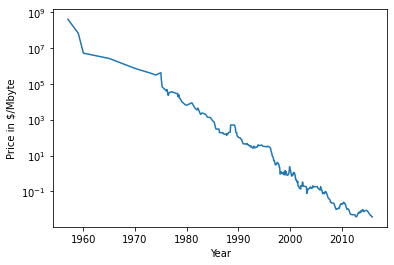

In [21]:
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte");

In [22]:
ram_prices.head()

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0
3,1965.0,2642412.0
4,1970.0,734003.0


In [23]:
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

<AxesSubplot:ylabel='Frequency'>

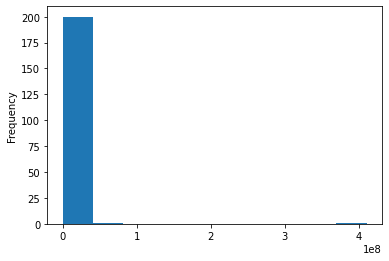

In [26]:
data_train.price.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

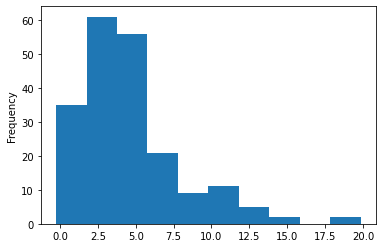

In [27]:
np.log(data_train.price).plot(kind='hist')

In [52]:
X_train = np.array(data_train.date).reshape(-1, 1)
y_train = np.log(data_train.price) # we use a log-transform to get a simpler relationship of data to target

X_all = np.array(ram_prices.date).reshape(-1, 1)

In [53]:
X_test = np.array(data_test.date).reshape(-1,1)
y_test = np.log(data_test.price)

Dopasuj regresje liniową i drzewo regresyjne:

In [75]:
tree = DecisionTreeRegressor(max_depth=7).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

In [76]:
#predykcja z testu
pred_tree = tree.predict(X_test)
pred_reg = linear_reg.predict(X_test)

In [77]:
pred_tree

array([0.85441533, 0.85441533, 0.85441533, 0.85441533, 0.85441533,
       0.85441533, 0.85441533, 0.85441533, 0.85441533, 0.85441533,
       0.85441533, 0.85441533, 0.85441533, 0.85441533, 0.85441533,
       0.85441533, 0.85441533, 0.85441533, 0.85441533, 0.85441533,
       0.85441533, 0.85441533, 0.85441533, 0.85441533, 0.85441533,
       0.85441533, 0.85441533, 0.85441533, 0.85441533, 0.85441533,
       0.85441533, 0.85441533, 0.85441533, 0.85441533, 0.85441533,
       0.85441533, 0.85441533, 0.85441533, 0.85441533, 0.85441533,
       0.85441533, 0.85441533, 0.85441533, 0.85441533, 0.85441533,
       0.85441533, 0.85441533, 0.85441533, 0.85441533, 0.85441533,
       0.85441533, 0.85441533, 0.85441533, 0.85441533, 0.85441533,
       0.85441533, 0.85441533, 0.85441533, 0.85441533, 0.85441533,
       0.85441533, 0.85441533, 0.85441533, 0.85441533, 0.85441533,
       0.85441533, 0.85441533, 0.85441533, 0.85441533, 0.85441533,
       0.85441533, 0.85441533, 0.85441533, 0.85441533, 0.85441

Sprawdź predykcje na całym zbiorze:

In [78]:
#predykcja z calosci
pred_tree_all = tree.predict(X_all)
pred_reg_all = linear_reg.predict(X_all)

In [79]:
price_tree = np.exp(pred_tree)
pred_reg = np.exp(pred_reg)

Pamiętaj, że modelowaliśmy transformację logarytmiczną. Funkcja odwracająca - wykładnicza.

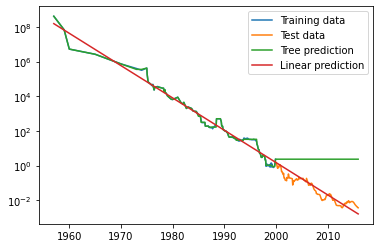

In [80]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, np.exp(pred_tree_all), label="Tree prediction")
plt.semilogy(ram_prices.date, np.exp(pred_reg_all), label="Linear prediction")
plt.legend()